In [1]:
#import basic libraries

import csv
import sys
import os
import math
import numpy as np
import numpy.linalg as npl
import scipy
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import (precision_recall_curve,
                             PrecisionRecallDisplay)
from sklearn import metrics
import matplotlib.ticker as mtick
import matplotlib as mpl
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import random
random.seed(5)


In [2]:
# load data
feature_file = "/home/yw180/place/data/merged_8/merge_user_emb/feature_4.csv"
df = pd.read_csv(feature_file, names=["#updates","#users","center_point_x", "center_point_y", "start_time","max_area","color_entropy", "successful"], header=None)
labels = df['successful']

In [4]:
df["successful"].value_counts()

successful
0    32531
1      611
Name: count, dtype: int64

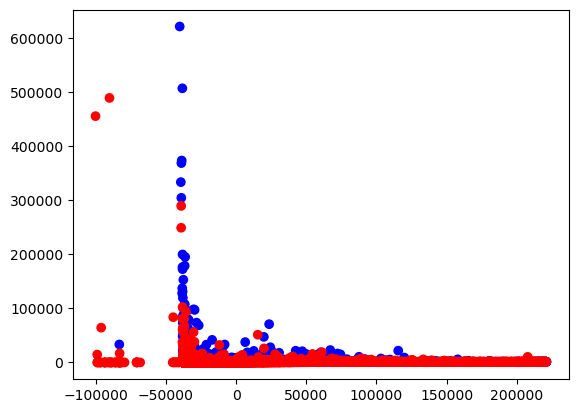

In [6]:
# feature = StandardScaler().fit_transform(possible_feature)
possible_combs = ["#updates","#users","center_point_x", "center_point_y","max_area","color_entropy"]
randomized_idx = random.sample(range(len(df)), len(df))
train_idx = randomized_idx[:23199]
test_idx = randomized_idx[23199:]
pca = PCA(n_components=2)

possible_feature = df.drop(columns = ['successful','center_point_x','center_point_y','color_entropy'])
# feature = StandardScaler().fit_transform(possible_feature)
result = pca.fit_transform(possible_feature)
x = [r[0] for r in result]
y = [r[1] for r in result]
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting the scatter plot
plt.scatter(x, y, c=colors)
# plt.savefig("plots/pca_"+str(item)+".png", dpi=400)

# Display the plot
plt.show()



In [6]:
feature = possible_feature.to_numpy()
train_f = feature[train_idx]
train_l = labels[train_idx]
test_f = feature[test_idx]
test_l = labels[test_idx]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_f, train_l)
pred_l = clf.predict(test_f)
# f1 score
fs = f1_score(pred_l, test_l)
print(str(item) + " F1 Score is:",fs)

NameError: name 'item' is not defined

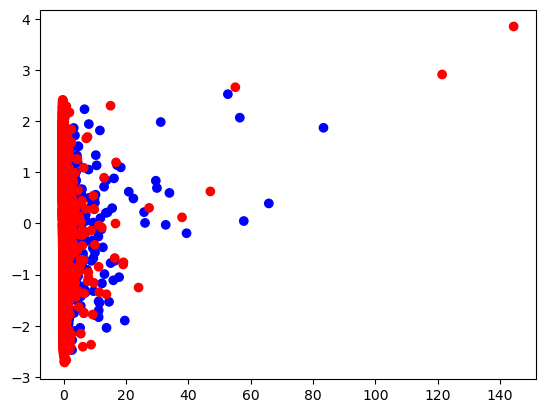

In [352]:
# x = [r[0] for r in result]
# y = [r[1] for r in result]
# colors = ['red' if label == 0 else 'blue' for label in labels]

# # Plotting the scatter plot
# plt.scatter(x, y, c=colors)


# # Display the plot
# plt.show()

In [450]:
tsne = TSNE(n_components=2)
result = tsne.fit_transform(feature)

In [ ]:
from sklearn.manifold import MDS
mds = MDS()
possible_feature = df.drop(columns = ['successful','center_point_x','center_point_y','#users'])
result = mds.fit_transform(possible_feature.to_numpy())
# result = pca.fit_transform(feature)
x = [r[0] for r in result]
y = [r[1] for r in result]
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting the scatter plot
plt.scatter(x, y, c=colors)
plt.savefig("plots/pca_"+str(item)+".png", dpi=400)

# Display the plot
plt.show()

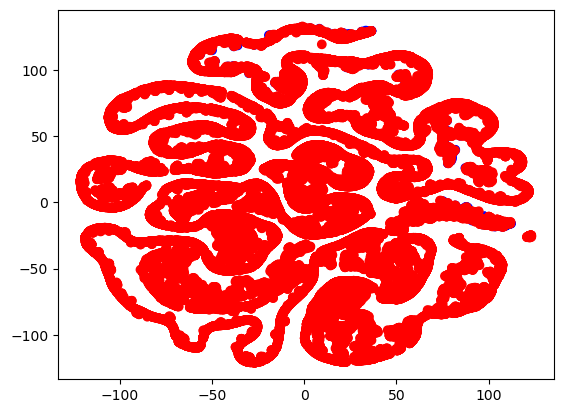

In [451]:
x = [r[0] for r in result]
y = [r[1] for r in result]
colors = ['red' if label == 0 else 'blue' for label in labels]

# Plotting the scatter plot
plt.scatter(x, y, c=colors)


# Display the plot
plt.show()

# Make train test set

In [16]:
import random
random.seed(5)
randomized_idx = random.sample(range(len(possible_feature)), len(possible_feature))
train_idx = randomized_idx[:23199]
test_idx = randomized_idx[23199:]

In [17]:
possible_feature  = df.drop(columns = ['successful'])
# possible_feature = df.drop(columns = ['successful'])
feature = possible_feature.to_numpy()
train_f = feature[train_idx]
train_l = labels[train_idx]
test_f = feature[test_idx]
test_l = labels[test_idx]

# Decision Tree

F1 Score is: 0.5386666666666666
ROC AUC is: 0.7628385804006063


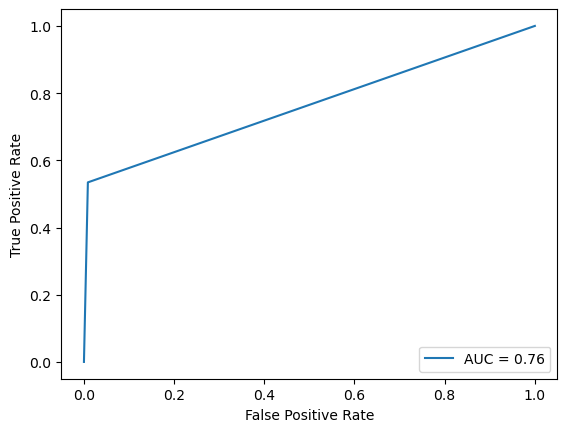

Precision_recall AUC is: 0.5241180197341607


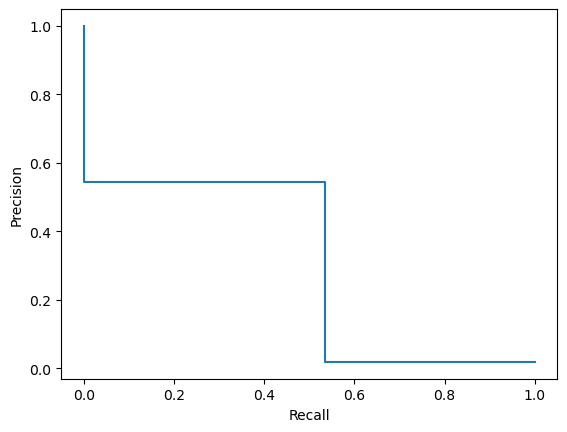

In [21]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_f, train_l)
pred_l = clf.predict(test_f)
# f1 score
fs = f1_score(pred_l, test_l)
print("F1 Score is:",fs)
plot_roc(test_l, pred_l)
plot_PR(test_l, pred_l)

In [13]:
from sklearn.metrics import roc_curve
# ROC
def plot_roc(test_l, pred_l):
    fpr, tpr, thresholds = roc_curve(test_l, pred_l)
    area_under_curve = metrics.auc(fpr, tpr)
    print("ROC AUC is:", area_under_curve)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=area_under_curve)
    display.plot()
    plt.show()

In [14]:
def plot_PR(test_l, pred_l):
    # Precision recall AUC
    precision, recall, _ = precision_recall_curve(test_l, pred_l)
    area_under_curve = metrics.auc(precision, recall)
    print("Precision_recall AUC is:", area_under_curve)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    disp.plot()

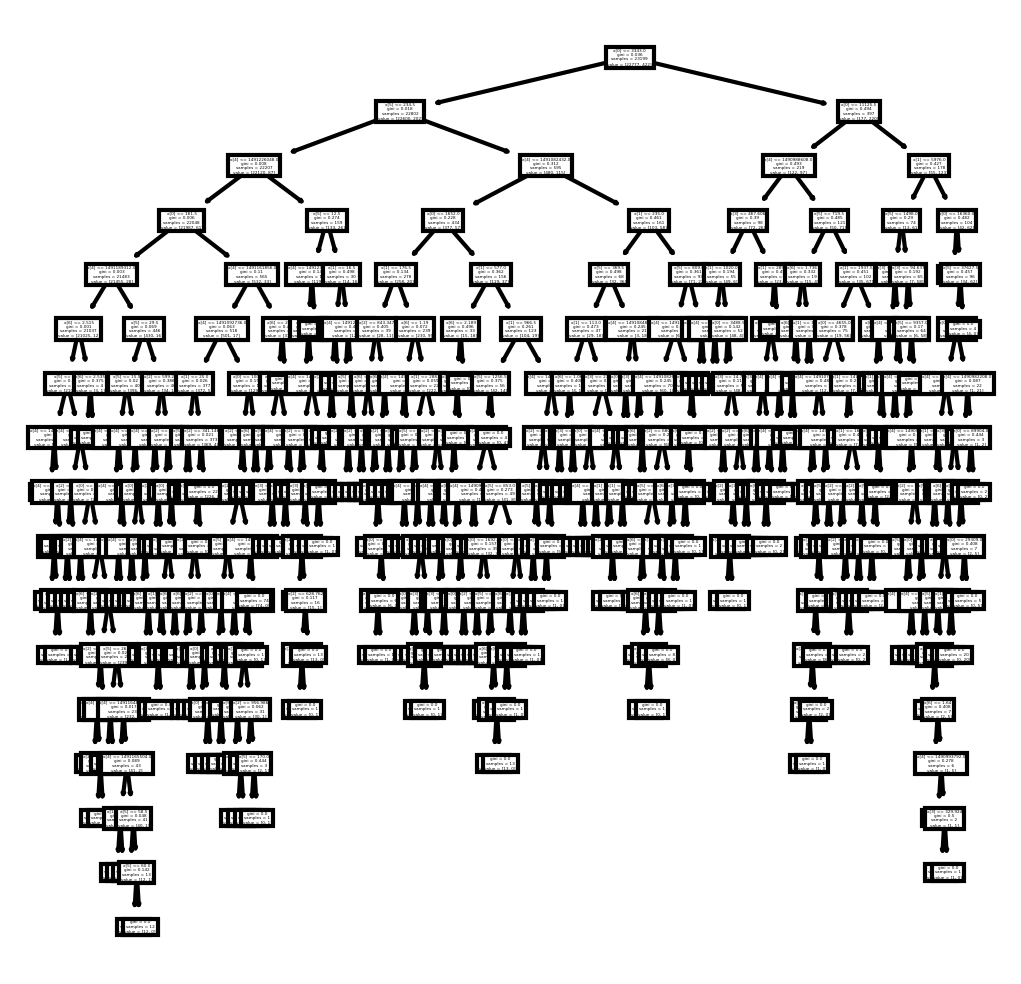

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf);
fig.savefig('plots/plottreedefault.png')

# Feature Importance

In [19]:
# "#updates","#users","center_point_x", "center_point_y", "start_time","max_area","color_entropy"
from sklearn.inspection import permutation_importance
permutation_importance(clf,train_f, train_l)

{'importances_mean': array([0.02819949, 0.02331135, 0.0048709 , 0.0037243 , 0.01337127,
        0.05197638, 0.00583646]),
 'importances_std': array([0.00043226, 0.00044663, 0.00018084, 0.00033121, 0.00071685,
        0.00076061, 0.00020869]),
 'importances': array([[0.02883745, 0.02857882, 0.02801845, 0.02780292, 0.02775982],
        [0.02331997, 0.02400966, 0.02344929, 0.02314755, 0.02263029],
        [0.00508643, 0.00465537, 0.00465537, 0.00495711, 0.00500022],
        [0.00379327, 0.00418121, 0.00392258, 0.0032329 , 0.00349153],
        [0.01444028, 0.01331954, 0.01387991, 0.01258675, 0.01262985],
        [0.05237295, 0.05142463, 0.05107979, 0.05323505, 0.05176947],
        [0.00599164, 0.00590543, 0.00586232, 0.00599164, 0.00543127]])}

# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

F1 Score is: 0.6139240506329114
ROC AUC is: 0.7550759259801704


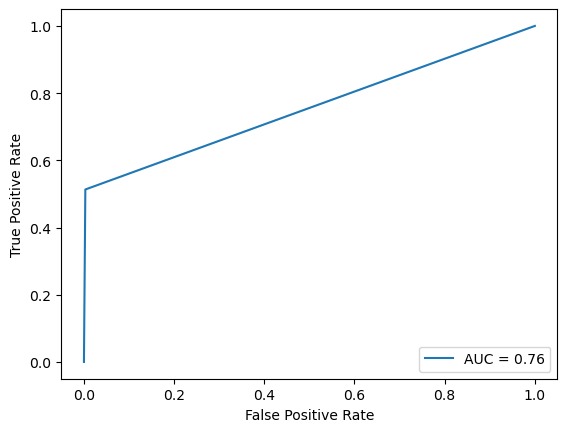

Precision_recall AUC is: 0.6241215431228426


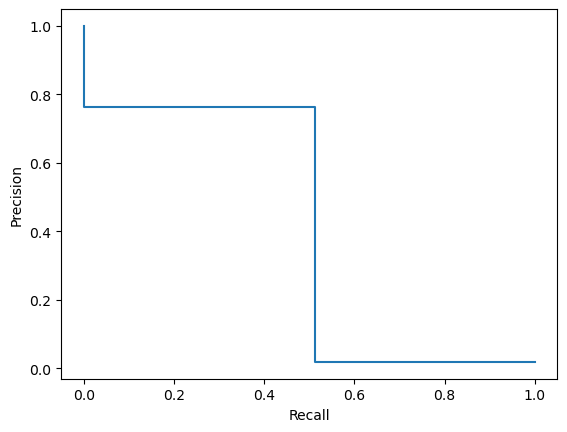

In [20]:
clf = RandomForestClassifier(random_state=0)
clf.fit(train_f, train_l)
pred_l = clf.predict(test_f)
fs = f1_score(pred_l, test_l)
print("F1 Score is:",fs)
plot_roc(test_l, pred_l)
plot_PR(test_l, pred_l)

# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf', random_state=0)
clf.fit(train_f, train_l)
pred_l = clf.predict(test_f)
fs = f1_score(pred_l, test_l)
print("F1 Score is:",fs)
plot_roc(test_l, pred_l)
plot_PR(test_l, pred_l)

# Gaussian Process

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier(random_state=0)
clf.fit(train_f, train_l)
pred_l = clf.predict(test_f)
fs = f1_score(pred_l, test_l)
print("F1 Score is:",fs)
plot_roc(test_l, pred_l)
plot_PR(test_l, pred_l)

F1 Score is: 0.0
ROC AUC is: 0.5


/home/yw180/.conda/envs/yw180/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


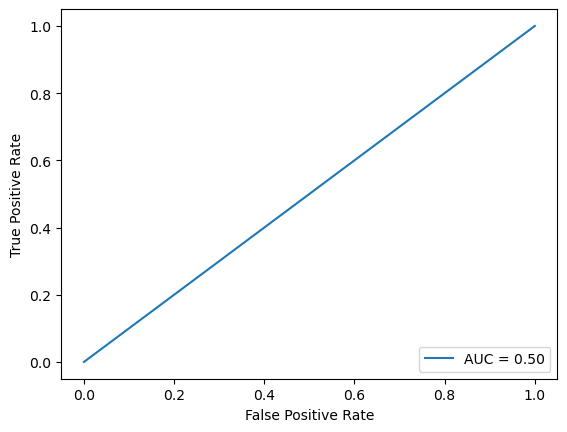

Precision_recall AUC is: 0.4904958262093935


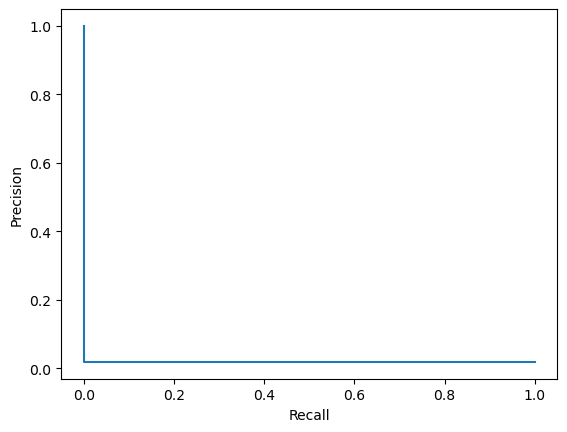

In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 4), random_state=1)
clf.fit(train_f, train_l)
pred_l = clf.predict(test_f)
fs = f1_score(pred_l, test_l)
print("F1 Score is:",fs)
plot_roc(test_l, pred_l)
plot_PR(test_l, pred_l)

# Color Entropy